# Predicting Milk Grade Using Ordered Logit
**by Franco Vidal and Matthew Henderson**

## Introduction and Motivation 
* remember to include in text citations
* what is grade?
* make all of this two paragraphs 

**Goal**: To develop a reliable method for predicting milk quality based on easily observable and measurable characteristics. 

**Motivation**: 
Milk has long been a dietary staple across the world, and its importance is undeniable. As a primary source of essential nutrients like calcium, protein, and vitamins, it plays a crucial role in global nutrition. Over 6 billion people consume milk and dairy products, and global production was around 930 million metric tons in 2022, with India, the European Union, the United States, and China leading the way. Given its widespread consumption, it’s not a surprise that dairy farming is a major factor of many economies, supporting millions of livelihoods. In countries like India, milk is deeply ingrained in daily life, with per capita consumption sitting at around 163 liters per year, while in the U.S., the average person still drinks around 62 liters per year despite shifting dietary trends. And while plant-based alternatives have gained traction, milk remains an irreplaceable component of many diets, particularly in areas where dairy is a key source of nutrition. Simply put, milk's global significance, both nutritionally and economically, speaks for itself.


Given milk’s undeniable global importance, ensuring its quality is just as critical. With billions of people consuming dairy daily, having a reliable and accessible way to assess milk quality is essential for both public health and economic stability. Quality Testing  can often require laboratory analysis, specialized equipment, and trained professionals—resources that may not be readily available in rural areas or developing regions where dairy consumption is high. Contaminated or spoiled milk can pose serious health risks, particularly in places where foodborne illnesses are a concern and proper refrigeration is limited. Additionally, inefficiencies in quality control can lead to significant economic losses for farmers and distributors. By developing an easy-to-use approach for assessing milk quality, we can help bridge this gap, offering a cost-effective solution to ensure safe and high-quality milk reaches consumers around the world.

## Data Description

The chosen dataset was aquired from kaggle.com and procured by Shrijayan Rajendran. Our dataset consists of 1059 entries with 8 columns. The predictors include ph, temperature, taste, odor, fat, turbidity, and color, and the target variable is the quality of the milk. Ph, temperature, and color are numeric, while taste, odor, fat, and turbidity are categorical and binary. Categorical predictors are defined as being either "good" or "bad" or "high" or "low". Ph indicates the pH (acidity) of the milk, temperature describes the temperature of the environment the milk was stored in and is in Celsius, and color describes the color of the milk and ranges from 240 to 255 with 255 indicating pure white. Grade (quality of milk), is ordinal: low, medium, and high. Note that Turbidity indicates the cloudiness or haziness of a fluid, caused by suspended particles like fat globules or proteins that are normally invisible to the naked eye. 

This particular set of data was chosen because of its feature's simplicity. This is because the data involves qualities that can be inspected and evaluated just by using ones senses. Understanding each feature does not require sophisticated tools, chemistry expertise, or advanced knowledge of the product. This makes the approach more accessible, especially in regions where testing equipment is unavailable. By relying on observable characteristics such as color and smell, milk quality can be assessed quickly and efficiently, reducing the need for costly or time-consuming laboratory analysis. This simplicity ensures that even individuals without technical expertise can make informed judgments about milk quality, making the method practical for both consumers and small-scale producers. Once the data is properly understood, we hope to produce a method for assessing milk quality that is reproduceable, precise, and easy to implement. 

## Exploratory Data Analysis:

#### Data Aquisition and Description

Import Packages Needed for EDA

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the Dataset and Encode variables

In [233]:
df = pd.read_csv('milknew.csv')
unencoded_df = df
df = pd.get_dummies(df, columns=['Taste', 'Odor', 'Fat', 'Turbidity'], drop_first=True)
df['Grade'] = df['Grade'].map({'low': 0, 'medium': 1, 'high': 2})
df

,pH,Temperature,Color,Grade,Taste_1,Odor_1,Fat_1,Turbidity_1
0,6.6,35,254,2,True,False,True,False
1,6.6,36,253,2,False,True,False,True
2,8.5,70,246,0,True,True,True,True
3,9.5,34,255,0,True,True,False,True
4,6.6,37,255,1,False,False,False,False
...,...,...,...,...,...,...,...,...
1054,6.7,45,247,1,True,True,False,False
1055,6.7,38,255,2,True,False,True,False
1056,3.0,40,255,0,True,True,True,True
1057,6.8,43,250,2,True,False,True,False


Summary Statistics

In [235]:
#Info

print("DataFrame Information:")
df_info = pd.DataFrame(df.info())
print(df_info, '\n')

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Color        1059 non-null   int64  
 3   Grade        1059 non-null   int64  
 4   Taste_1      1059 non-null   bool   
 5   Odor_1       1059 non-null   bool   
 6   Fat_1        1059 non-null   bool   
 7   Turbidity_1  1059 non-null   bool   
dtypes: bool(4), float64(1), int64(3)
memory usage: 37.4 KB
Empty DataFrame
Columns: []
Index: [] 



In [236]:
# Describe 
print("Descriptive Statistics:")
desc = df.describe(include='all').T
desc = desc.round(2)  
print(desc, '\n')

Descriptive Statistics:
              count unique    top freq        mean        std    min    25%  \
pH           1059.0    NaN    NaN  NaN    6.630123   1.399679    3.0    6.5   
Temperature  1059.0    NaN    NaN  NaN   44.226629  10.098364   34.0   38.0   
Color        1059.0    NaN    NaN  NaN  251.840415   4.307424  240.0  250.0   
Grade        1059.0    NaN    NaN  NaN    0.836638   0.787868    0.0    0.0   
Taste_1        1059      2   True  579         NaN        NaN    NaN    NaN   
Odor_1         1059      2  False  601         NaN        NaN    NaN    NaN   
Fat_1          1059      2   True  711         NaN        NaN    NaN    NaN   
Turbidity_1    1059      2  False  539         NaN        NaN    NaN    NaN   

               50%    75%    max  
pH             6.7    6.8    9.5  
Temperature   41.0   45.0   90.0  
Color        255.0  255.0  255.0  
Grade          1.0    1.0    2.0  
Taste_1        NaN    NaN    NaN  
Odor_1         NaN    NaN    NaN  
Fat_1          NaN 

In [237]:
# Columns
print("Columns in the DataFrame:")
print(df.columns.tolist(), '\n')

Columns in the DataFrame:
['pH', 'Temperature', 'Color', 'Grade', 'Taste_1', 'Odor_1', 'Fat_1', 'Turbidity_1'] 



In [238]:
# Missing values summary
print("Missing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0], '\n')

Missing Values in Each Column:
Series([], dtype: int64) 



#### Plotting Continuous Features

Distribution

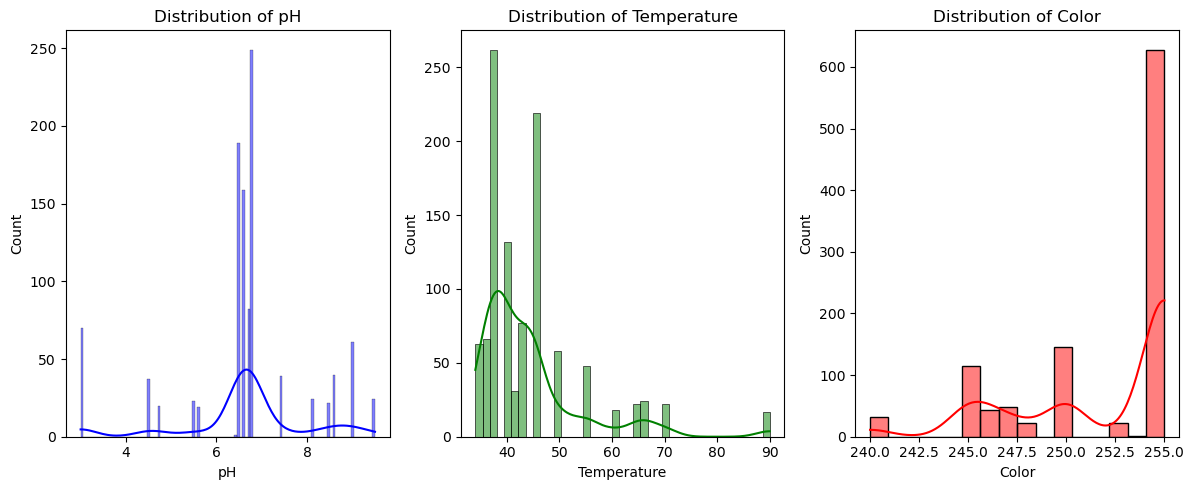

In [241]:
# Create a figure and a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot each histogram on a different axis
sns.histplot(df['pH'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of pH')

sns.histplot(df['Temperature'], kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of Temperature')

sns.histplot(df['Color'], kde=True, color='red', ax=axes[2])
axes[2].set_title('Distribution of Color')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Temperature looks to be rightwardly-skewed, with most values falling between 30 and 50 degrees celsius. This makes sense, as it is unlikely that milk would be stored at temperatures any higher than that unless under very extreme circumstances.

Color is skewed left, indicating most of the observed milk is fairly close to pure white. 

Boxplots, Outliers

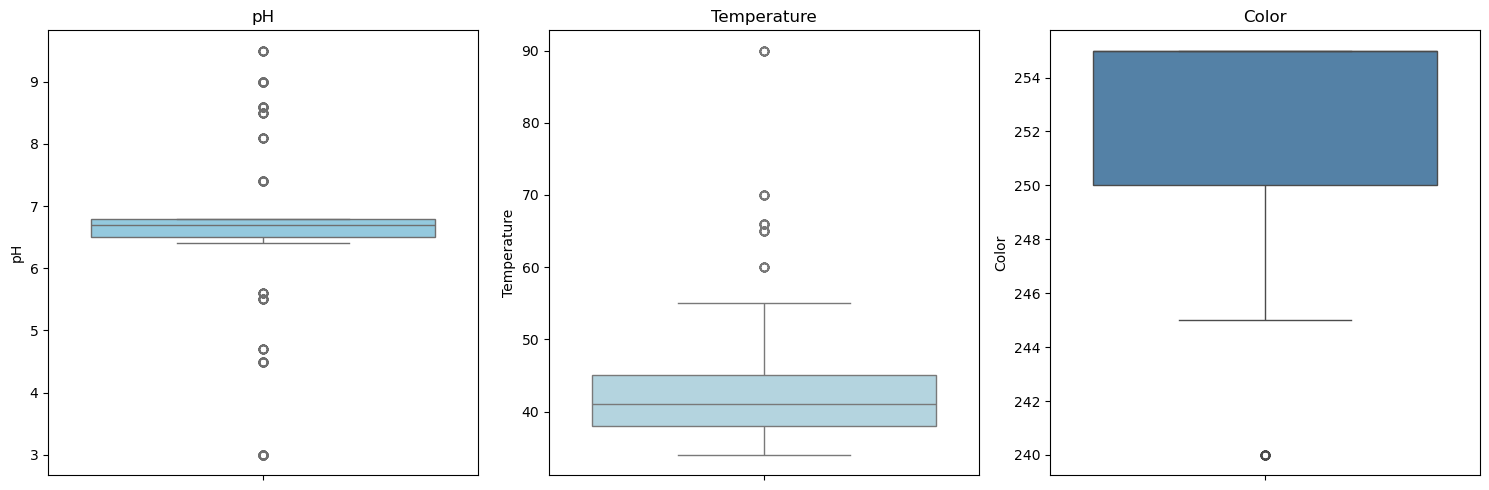

In [245]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each boxplot in its own subplot
sns.boxplot(y=df['pH'], ax=axes[0], color='skyblue')
axes[0].set_title('pH')

sns.boxplot(y=df['Temperature'], ax=axes[1], color='lightblue')
axes[1].set_title('Temperature')

sns.boxplot(y=df['Color'], ax=axes[2], color='steelblue')
axes[2].set_title('Color')

# Optional: Tidy layout
plt.tight_layout()
plt.show()

temp and color appear to have outliers. well make sure to watch out for this later on in diagnostics

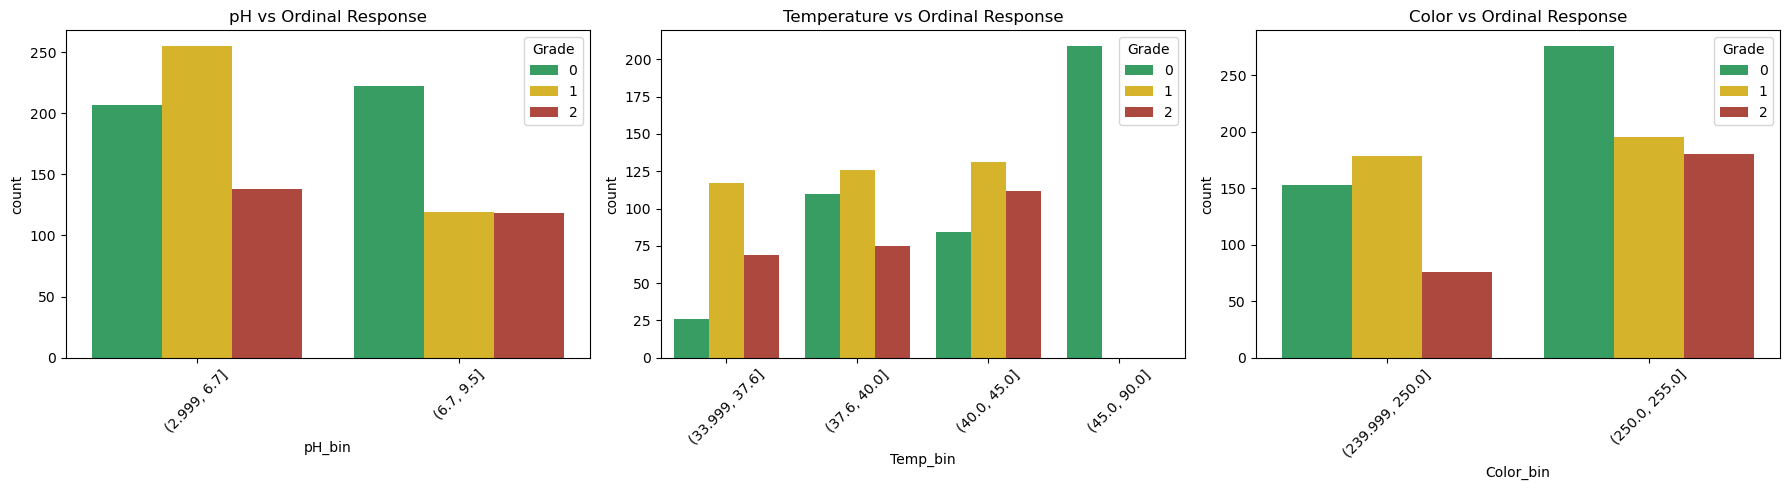

In [248]:
# Example: bin into quartiles (or change to custom bins)
df['pH_bin'] = pd.qcut(df['pH'], q=2, duplicates='drop')
df['Temp_bin'] = pd.qcut(df['Temperature'], q=5, duplicates='drop')
df['Color_bin'] = pd.qcut(df['Color'], q=3, duplicates='drop')

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot for binned pH
sns.countplot(x='pH_bin', hue='Grade', data=df, ax=axes[0], palette={0: '#27ae60', 1: '#f1c40f', 2: '#c0392b'})
axes[0].set_title('pH vs Ordinal Response')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for binned Temperature
sns.countplot(x='Temp_bin', hue='Grade', data=df, ax=axes[1], palette={0: '#27ae60', 1: '#f1c40f', 2: '#c0392b'})
axes[1].set_title('Temperature vs Ordinal Response')
axes[1].tick_params(axis='x', rotation=45)

# Bar plot for binned Color
sns.countplot(x='Color_bin', hue='Grade', data=df, ax=axes[2], palette={0: '#27ae60', 1: '#f1c40f', 2: '#c0392b'})
axes[2].set_title('Color vs Ordinal Response')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Plotting Categorical Features

Distribution of Categorical Variables 

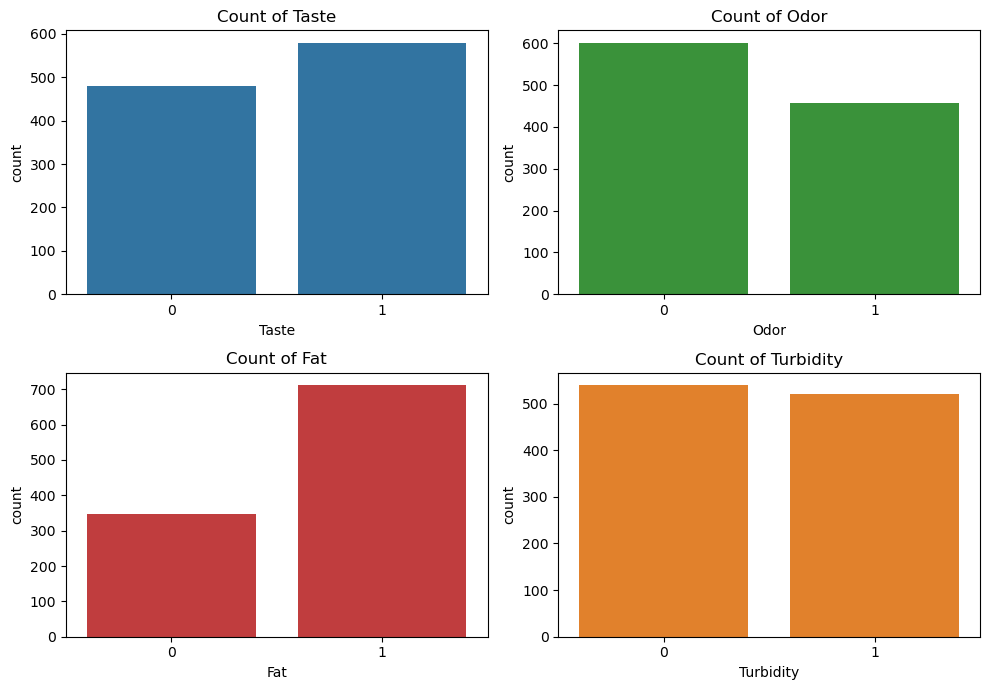

In [251]:
# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Plot each countplot on a different axis
sns.countplot(x='Taste', data=unencoded_df, ax=axes[0, 0], color = '#1f77b4')
axes[0, 0].set_title('Count of Taste')

sns.countplot(x='Odor', data=unencoded_df, ax=axes[0, 1], color = '#2ca02c')
axes[0, 1].set_title('Count of Odor')

sns.countplot(x='Fat', data=unencoded_df, ax=axes[1, 0], color = '#d62728' )
axes[1, 0].set_title('Count of Fat')

sns.countplot(x='Turbidity', data=unencoded_df, ax=axes[1, 1], color = '#ff7f0e')
axes[1, 1].set_title('Count of Turbidity')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

From our distribution plots we can see a fairly normal distribution of our continuous variables as well as even distributions of categorical variables, with some exceptions. This validates the key assumptions for our classification problem.

Categorical vs. Response

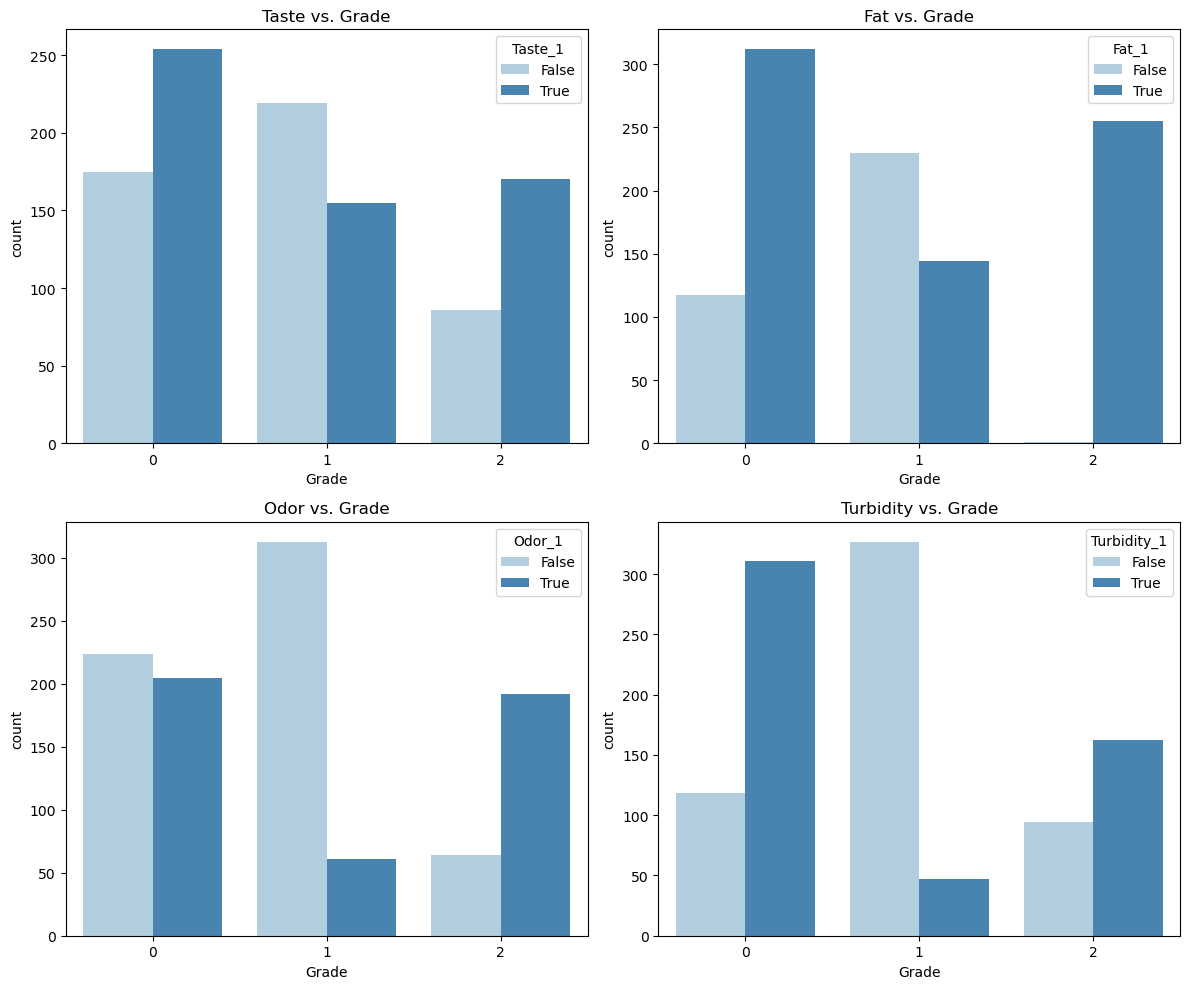

In [254]:
# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1
sns.countplot(x='Grade', hue='Taste_1', data=df, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Taste vs. Grade')

# Plot 2
sns.countplot(x='Grade', hue='Fat_1', data=df, ax=axes[0, 1], palette='Blues')
axes[0, 1].set_title('Fat vs. Grade')

# Plot 3
sns.countplot(x='Grade', hue='Odor_1', data=df, ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title('Odor vs. Grade')

# Plot 4
sns.countplot(x='Grade', hue='Turbidity_1', data=df, ax=axes[1, 1], palette='Blues')
axes[1, 1].set_title('Turbidity vs. Grade')

# Improve layout
plt.tight_layout()
plt.show()

#### Analyzing correlation

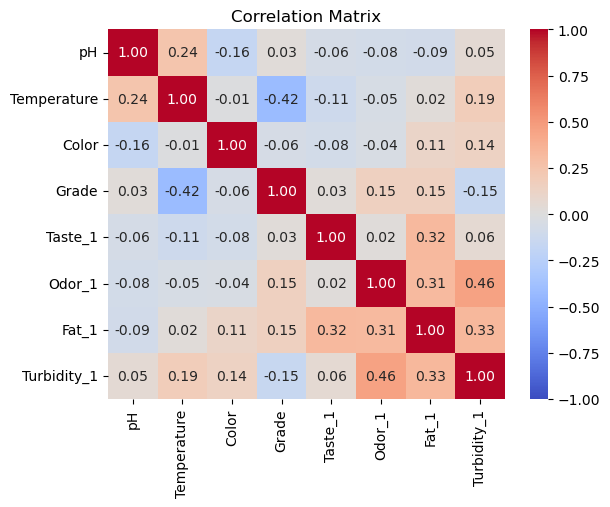

In [256]:
df = df.drop(columns = {'pH_bin', 'Temp_bin', 'Color_bin'})

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

From our correlation matrix, we can see that color and temperature are the two strongest predictors for grade in terms of correlation. Logically speaking, this seems reasonable given that temperature and color of milk typically change depending on the quality (i.e. temperature and color change when milk gets spoiled). Additionally, we see high correlation between odor and turbidity as well as fat and turbidity. Again this seems reasonable and will likely need to be addressed elsewhere in our analysis. Some ways in which we can address this is implementing interaction terms based on this correlation, removing features, or implement model features like an l1 penalty to reduce the negative effects of multicollinearity by implicit feature selection.

## Preliminary Model: Selection, Implementation, and Diagnostics 

#### Model Selection

explain what multinomial regression is and why we chose to start with it 

also if including interactions at this point, explain that 

#### Model Implementation

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['pH', 'Temperature', 'Color', 'Taste_1', 'Odor_1', 'Fat_1', 'Turbidity_1']]
y = df['Grade']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

full_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100)
full_model.fit(X_train, y_train)

continuous_features = ['pH', 'Temperature', 'Color']

log_odds = full_model.predict_proba(X_train)
log_odds = np.log(log_odds[:, 1] / (1 - log_odds[:, 1]))

C:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Diagnostics

Assumptions 

Assumption 1: Categorical Outcome

- Verified by Grade being mapped categorically by low, medium, and high, represented by 0, 1, 2

Assumption 2: Linearity.

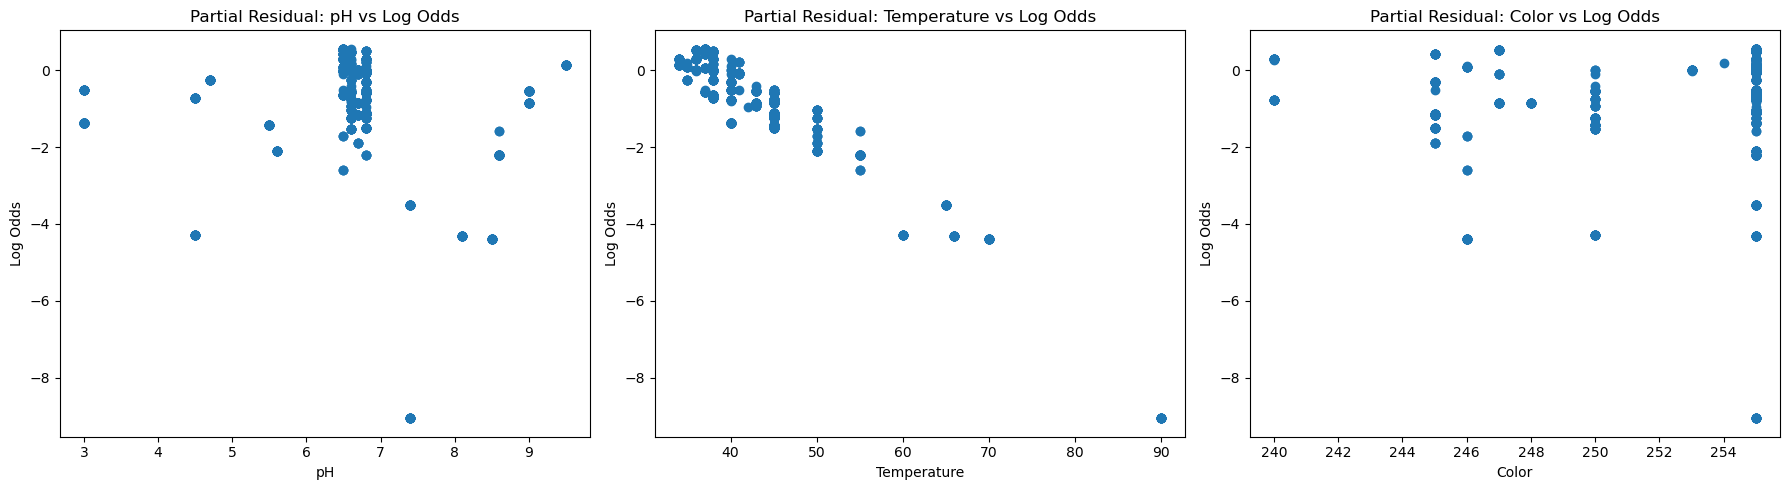

In [267]:
# Create a 1x3 grid of subplots with an appropriate figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through each feature and its corresponding axis
for ax, feature in zip(axes, continuous_features):
    ax.scatter(X_train[feature], log_odds)
    ax.set_xlabel(feature)
    ax.set_ylabel('Log Odds')
    ax.set_title(f'Partial Residual: {feature} vs Log Odds')

plt.tight_layout()
plt.show()


From the partial residual plots, we can determine that there is a linear relationship between the log odds and our continuous features, as the residuals look to be approximately random around y=0. Moving forward, we will explore transformations to strengthen the linear relationship.

Assumption 3: Independence of observations

- Verified by confirming that our data isn't grouped by some external variable like time (not a time series) and there is only one row per sample.

Assumption 4: Proportional Odds

In [271]:
assumption_4_df = df.copy()
assumption_4_df['1_vs_0'] = (df['Grade'] >= 1).astype(int)
assumption_4_df['2_vs_1_and_0'] = (df['Grade'] == 2).astype(int)

X = df[['pH', 'Temperature', 'Color', 'Taste_1', 'Odor_1', 'Fat_1', 'Turbidity_1']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model1 = LogisticRegression().fit(X_scaled, assumption_4_df['1_vs_0'])
model2 = LogisticRegression().fit(X_scaled, assumption_4_df['2_vs_1_and_0'])

comparison = pd.DataFrame({ 'Coefficients: 1 vs 0': model1.coef_[0],
                            'Coefficients: 2 vs 1 and 0': model2.coef_[0] })

print(comparison)

   Coefficients: 1 vs 0  Coefficients: 2 vs 1 and 0
0              0.332185                    0.845622
1             -3.052228                   -1.935448
2             -0.974337                    0.474284
3             -1.216529                    0.280968
4              0.240830                    1.395861
5              0.229903                    3.045528
6             -1.027464                   -0.309098


Verified by comparing coefficients in model of grade 1 vs grade 0 and model of grade 2 vs grade 1 and 0. This assumption was violated, so we opt for non-ordinal multinomial logit to compensate

Analyzing Collinearity 

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = X.astype(float) 
VIF = add_constant(X)

for i, feature in enumerate(X.columns):
    vif = variance_inflation_factor(VIF.values, i)
    print(f'{feature}: {vif}')

pH: 3930.8661526268734
Temperature: 1.1162601841729367
Color: 1.1362083476078453
Taste_1: 1.102203435095808
Odor_1: 1.1722602030927414
Fat_1: 1.4022910649136435
Turbidity_1: 1.3442375686994306


Outlier Detection

In [280]:
import statsmodels.api as sm

threshold = 1
outliers = []

y_temp = (df['Grade'] >= 1).astype(int)
model = sm.Logit(y_temp, X)
result = model.fit()
cooks_distance = result.get_influence().cooks_distance[0]

for i, distance in enumerate(cooks_distance):
    if distance > threshold: outliers.append(i)

if not outliers: print("No outliers detected")
else: print(f"Outliers detected at indices: {outliers}")

Optimization terminated successfully.
         Current function value: 0.417140
         Iterations 7
No outliers detected


Classification Report

In [282]:
y_pred = full_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.49      0.64        78
           1       0.73      0.94      0.82        86
           2       0.55      0.69      0.61        48

    accuracy                           0.72       212
   macro avg       0.74      0.71      0.69       212
weighted avg       0.76      0.72      0.71       212



C:\Users\matth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy

In [284]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7169811320754716

## Revised Model: Standardization, Transformations, Variable Selection, Penalties, and Final Results

#### Standardization

In [286]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Tranformations

#### Variable Selection

#### Penalties

In [293]:
lasso_model = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=100)
lasso_model.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='saga')

#### Diagnostics

Classification Report

In [296]:
y_pred = lasso_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        78
           1       0.93      0.83      0.88        86
           2       0.68      0.79      0.73        48

    accuracy                           0.84       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.85      0.84      0.84       212



In [ ]:
Accuracy

In [298]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.839622641509434

## Challenges and Future Direction

### Future Direction (FROM CHECKPOINT ONE NOT PART OF FINAL REPORT)


Moving forward, we plan to expand on our feature engineering and feature selection, data augmentation, and model selection. As of now, we are including all features in our model, however, it is likely that there are certain variables that aren’t necessary for inference and from our correlation matrix, we can see opportunities for interaction terms, specifically between turbidity and odor and fat. We will also experiment with removing taste as a feature as it would be beneficial if we could create a model to predict milk quality without needing to ingest the milk. 
In terms of data augmentation, there are likely better representations of our data that we can experiment with but were unable to explore deeply due to time limitations. After this checkpoint, we will explore applying augmentations and transformations to our data to better strengthen the linear relationship between our features and our log-loss. This will allow us to better represent and predict our data, leading to better results.
In terms of model selection, we don’t plan on deviating from logistic regression with softmax activation. However, we will likely explore implementing slight variations like l1 or l2 penalty terms in order to help assist in combating potential overfitting, multicollinearity, as well as the slight prevalence of outliers highlighted in our boxplots.

### Sources

Data Source: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data


Works Cited:\
https://www.lexjansen.com/wuss/2018/130_Final_Paper_PDF.pdf
https://www.researchgate.net/publication/376064637_Milk_Quality_Prediction_Using_Machine_Learning/link/67a9df27207c0c20fa81b7a8/download
https://www.fao.org/dairy-production-products/production/milk-production/en
https://en.wikipedia.org/wiki/List_of_countries_by_milk_consumption_per_capita
https://rankingroyals.com/agriculture/highest-milk-consumption-per-capita-top-185-countries
https://www.oatly.com/things-we-do/initiatives/schoolmilk/global-milk-and-dairy-consumption
https://en.wikipedia.org/wiki/Turbidity

# We, the project teams members, certify that below is an accurate account of the percentage of effort contributed by each team member in the project and report.


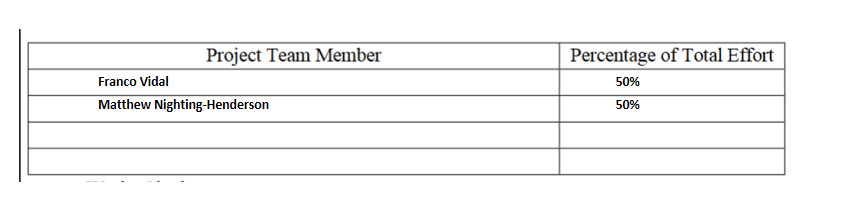
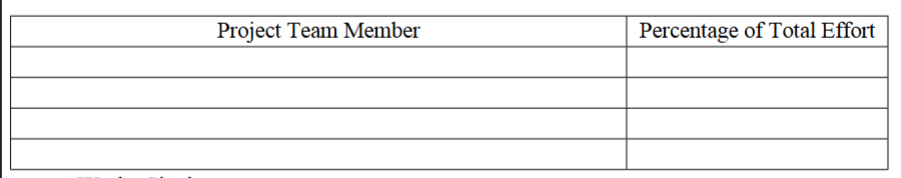